In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

density = 1000

# Modified 22 March
def generate_gaussian():
    mu = np.random.uniform(low=5,high=200)
    variance = 20
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 25)
    y = stats.norm.pdf(x, mu, sigma) * np.random.uniform(low=1, high=8)
    y = y*500

    pref_x = np.array(range(density))
    new_y = np.interp(pref_x,x,y)

    new_y += np.random.uniform(low=0,high=20,size=(density,))

    return (pref_x,new_y)

# def generate_gaussian():
#     mu = np.random.uniform(low=5,high=30)
#     variance = 20
#     sigma = math.sqrt(variance)
#     x = np.linspace(mu - 3*sigma, mu + 3*sigma, 25)
#     y = stats.norm.pdf(x, mu, sigma) * np.random.uniform(low=1, high=8)


#     pref_x = np.array(range(density))
#     new_y = np.interp(pref_x,x,y)

#     new_y += np.random.uniform(low=0,high=0.1,size=(density,))

#     return (pref_x,new_y)



def f(x,a,tau):
    return a * np.exp(-x/tau)


def generate_decay_curve(amin,amax,taumin,taumax):
    a = np.random.uniform(low=amin,high=amax)
    tau = np.random.uniform(low=taumin,high=taumax)
    x = np.array(range(density))
    y = f(x,a,tau)

    return (y,a,tau)
    

def generate_dataset():
    (x,y) = generate_gaussian()
    (dec_y,a,t) = generate_decay_curve()
    z = np.convolve(y,dec_y)[:density]
    # z += np.random.uniform(0,0.2)
    z = z +  np.random.uniform(low=-z/6,high=z/6, size=density)


    input = np.concatenate((z,y))

    t = t/50
    output = (a,t)

    return (input,output)

In [2]:
def generate_dataset_two():
    (x,y) = generate_gaussian()
    
    (dec_y,a,t) = generate_decay_curve(amin=0.1,amax=1,taumin=0.1,taumax=15)
    (dec_y_2,a2,t2) = generate_decay_curve(amin=0.1,amax=1,taumin=15,taumax=100)

    new_dec = dec_y + dec_y_2

    t = t/15
    t2 = (t2 - 15)/85

    z = np.convolve(y,new_dec)[:density]
    z = z +  np.random.uniform(low=-z/6,high=z/6, size=density)

    input = np.concatenate((z,y))
    output = np.array([a,t,a2,t2,0,0])
    output = output.reshape(6)

    return (input,output)

In [3]:
""
x_list = []
y_list = []
for i in range(100000):
  
    (x,y) = generate_dataset_two()
  
    x_list.append(x)
    y_list.append(y)

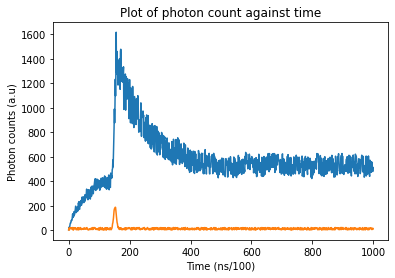

In [4]:
import matplotlib.pyplot as plt

x = np.array(range(density))
plt.plot(x,x_list[0][:density])
plt.plot(x,x_list[0][density:])
plt.xlabel("Time (ns/100)")
plt.ylabel("Photon counts (a.u)")
plt.title("Plot of photon count against time")
a = y_list[0][0]
tau = y_list[0][1]

# plt.plot(x,f(x,a,tau))
plt.show()

In [5]:
import tensorflow as tf

x_list = np.array(x_list)
y_list = np.array(y_list)

x_list = tf.keras.utils.normalize(x_list)

print(x_list.shape)
print(y_list.shape)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_list, y_list, test_size=0.10, random_state=40)




(100000, 2000)
(100000, 6)


In [6]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import tensorflow as tf


model = Sequential()
model.add(Dense(200, activation='relu', input_dim=density*2))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(6, activation='relu'))

In [7]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)
# model.summary()

Epoch 1/50
563/563 [==============================] - 13s 22ms/step - loss: 0.1029 - accuracy: 0.2485 - val_loss: 0.0493 - val_accuracy: 0.2661
Epoch 2/50
563/563 [==============================] - 10s 18ms/step - loss: 0.0560 - accuracy: 0.2652 - val_loss: 0.0433 - val_accuracy: 0.3528
Epoch 3/50
563/563 [==============================] - 10s 18ms/step - loss: 0.0489 - accuracy: 0.3058 - val_loss: 0.0388 - val_accuracy: 0.3852
Epoch 4/50
563/563 [==============================] - 10s 18ms/step - loss: 0.0452 - accuracy: 0.3380 - val_loss: 0.0363 - val_accuracy: 0.3963
Epoch 5/50
563/563 [==============================] - 10s 18ms/step - loss: 0.0427 - accuracy: 0.3629 - val_loss: 0.0351 - val_accuracy: 0.4059
Epoch 6/50
563/563 [==============================] - 10s 17ms/step - loss: 0.0410 - accuracy: 0.3833 - val_loss: 0.0334 - val_accuracy: 0.4299
Epoch 7/50
563/563 [==============================] - 10s 18ms/step - loss: 0.0390 - accuracy: 0.4012 - val_loss: 0.0317 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 7.1347e-04 - accuracy: 0.9581


[0.0007134663756005466, 0.9581000208854675]

In [18]:
m_list = []
n_list = []
for i in range(100):
  (m,n) = generate_dataset_two()
  m_list.append(m)
  n_list.append(n)


m = np.array(m_list)
m = tf.keras.utils.normalize(m)
n = np.array(n_list)

# print(n_list)

In [19]:

pred_n = model.predict(m)

In [20]:
pred_n = np.array(pred_n)

Text(0.5, 1.0, 'A plot of 50 points of predicted lifetime against generated\n lifetime for a double exponential decay model')

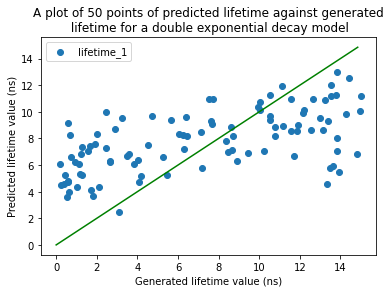

In [26]:
n_list_ = np.array(n_list).T
pred_n_ = pred_n.T

n_list_0 = n_list_[1] * 15
pred_n_0 = pred_n_[1] * 15

# n_list_1 = n_list_[3] * 85 + 15
# pred_n_1 = pred_n_[3] * 85 + 15


# n_list_2 = n_list_[0]
# pred_n_2 = pred_n_[0]

# n_list_4 = n_list_[2]
# pred_n_4 = pred_n_[2]


x = np.array(range(100))/100*15





# plt.scatter(n_list_0,pred_n_0,label="lifetime_1")
plt.scatter(n_list_0,pred_n_0,label="lifetime_1")
# plt.scatter(n_list_1,pred_n_1,label="lifetime_2")
plt.plot(x,x,c='g')
plt.legend()
plt.xlabel("Generated lifetime value (ns)")
plt.ylabel("Predicted lifetime value (ns)")
plt.title("A plot of 50 points of predicted lifetime against generated\n lifetime for a double exponential decay model")
# # plt.show()



[[0.54592925 0.52344894 0.65689635 0.28071925 0.         0.        ]]
[0.36956353 0.65359402 0.69887438 0.28421737 0.         0.        ]


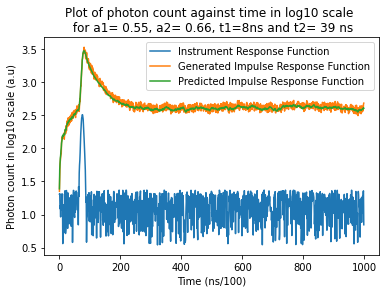

In [ ]:
(m,n) = generate_dataset_two()

m_norm = tf.keras.utils.normalize(m)

m_norm = np.array(m_norm)

pred_n = model.predict(m_norm)

print(pred_n)

x = np.array(range(1000))
a = float(pred_n[0][0])
tau = float(pred_n[0][1])*15
a2 = float(pred_n[0][2])
tau2 = float(pred_n[0][3]) * 85 + 15
irf = m[density:]
y = np.convolve(irf, f(x,a,tau) + f(x,a2,tau2))[:density]

plt.plot(x,np.log10(irf),label="Instrument Response Function")
plt.plot(x,np.log10(m[:density]),label="Generated Impulse Response Function")
plt.plot(x,np.log10(y),label="Predicted Impulse Response Function")
plt.legend()
plt.xlabel("Time (ns/100)")
plt.ylabel("Photon count in log10 scale (a.u)")
plt.title("Plot of photon count against time in log10 scale \n for a1= {}, a2= {}, t1={}ns and t2= {} ns".format(round(a,2),round(a2,2), round(tau),round(tau2)))
print(n)

plt.show()

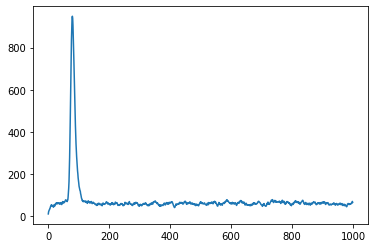

In [ ]:



y = np.convolve(irf,f(x,a,tau))[:density]

# print(y)

plt.plot(x,y)
plt.show()

In [21]:
n_ = 1 - np.absolute(pred_n-n)/ pred_n

print(np.mean(n_,axis=0))


# print(np.mean(n_, axis=0))

# n = np.array(n_list)
# pred_n_ = pred_n

# print(np.mean(n,axis=0))
# print(np.mean(pred_n,axis=0))



[0.63191513 0.5103613  0.8424977  0.85882501        nan        nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
model.save("mymodel")

INFO:tensorflow:Assets written to: mymodel/assets
